#**DATA LOADING**

In [1]:
## Import important Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Connecting google drive with colab

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
## importing Dataset

df = pd.read_csv('/drive/My Drive/Pandas/diabetes.csv')


#**Exploratory Data Analysis (EDA)**

###### Understanding the Dataset

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###### Handling Null Values

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values present in the dataset.

####Checking Statistical Summary of Dataset

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* The average Blood Presssure is around 70.
* The average glucode level is around 121.
* The minimum blood pressure is 0 that is not biologically possible, so we can say that like 0 might be a placeholder for missing values.
* Around 35% of peoples in the dataset have diabetes.

#### Handling missing values

In [9]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
## Assigning the columns in a variable which have 0 in their values

Zero_columns = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']

# Replacing 0 with nan

df[Zero_columns] = df[Zero_columns].replace(0,np.nan)

In [11]:
## Checkingh nulls values

df.isna().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
## Filling null values with mean and median

df[['Glucose', 'BloodPressure', 'BMI']] = df[['Glucose', 'BloodPressure', 'BMI']].fillna(df[['Glucose', 'BloodPressure', 'BMI']].mean())
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].fillna(df[['SkinThickness', 'Insulin']].mean())

In [13]:
## Checkingh nulls values

df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Data Visulization**

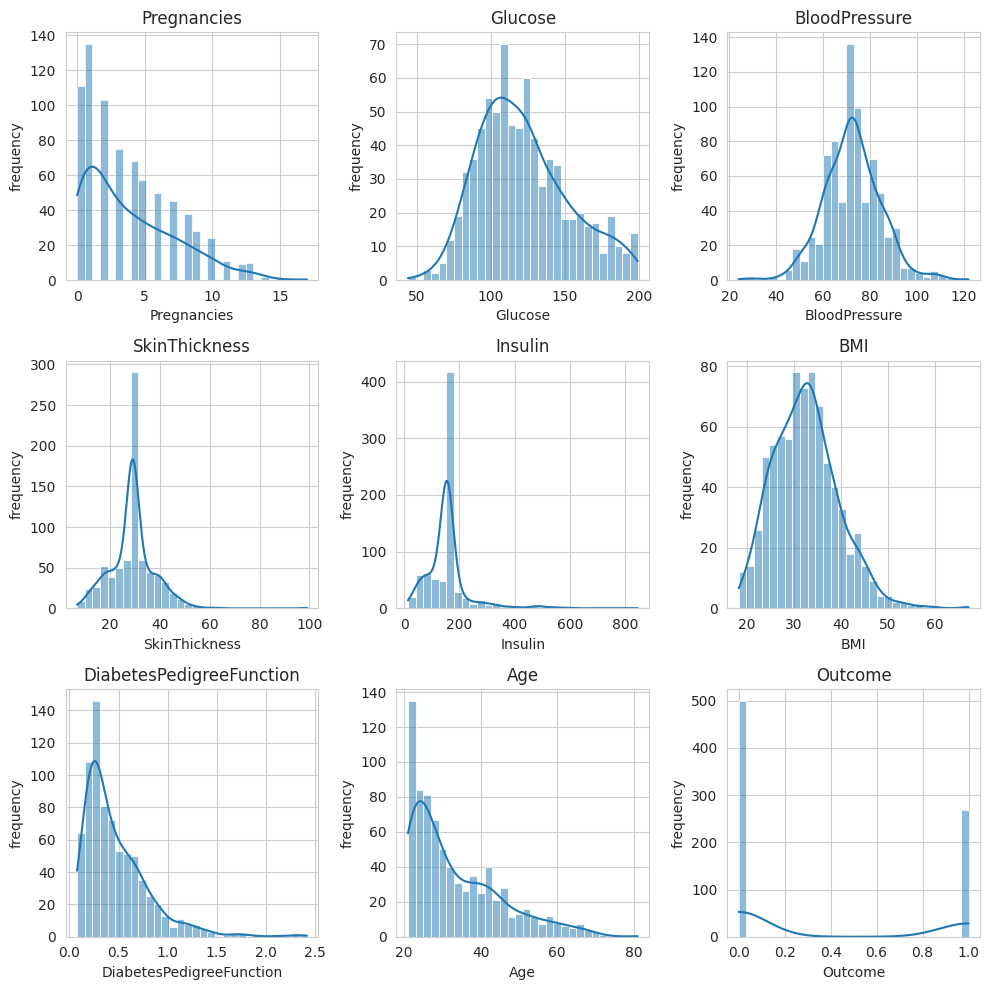

In [14]:
# set the styles for seaborn plots
sns.set_style('whitegrid')

# set the figure size
plt.figure(figsize = (10,10))

# initiating the histogram plot
for i, column in enumerate(df.columns,1):
  plt.subplot(3,3,i)
  sns.histplot(df[column], bins = 30, kde = True)
  plt.title(column, fontsize = 12)
  plt.xlabel(column)
  plt.ylabel('frequency')
  plt.tight_layout()


.

.

Insights, that we got from histogram,

* **Pregnancies:** Most of the women in the dataset have had either no pregnancies or only 1 or 2 pregnancies. There are fewer women who have had more pregnancies.

* **Glucose:**The levels of glucose (sugar in the blood) follow a somewhat normal pattern, but there is a small group of people with lower glucose levels.

* **Blood Pressure:** Blood pressure values tend to center around 70. It's like the average or typical blood pressure in the dataset.

* **Skin Thickness:** Many people in the dataset have lower skin thickness values, and there's a peak around those values. It means that a significant number of individuals have relatively thinner skin.

* **Insulin:** Most people have lower insulin levels, but there are a few individuals with higher insulin values.

* **BMI (Body Mass Index):** BMI values are slightly skewed to the right, with a peak around 30. This suggests that many people have a BMI around 30, which is considered overweight.

* **Diabetes Pedigree Function:** The majority of individuals in the dataset have a low value for this function, indicating that, based on their family history, they have a lower likelihood of developing diabetes.

* **Age:** Most people in the dataset are in their 20s and 30s, with relatively fewer individuals in other age groups.

* **Outcome**: More people in the dataset do not have diabetes (labeled as 0) compared to those who do have diabetes (labeled as 1).

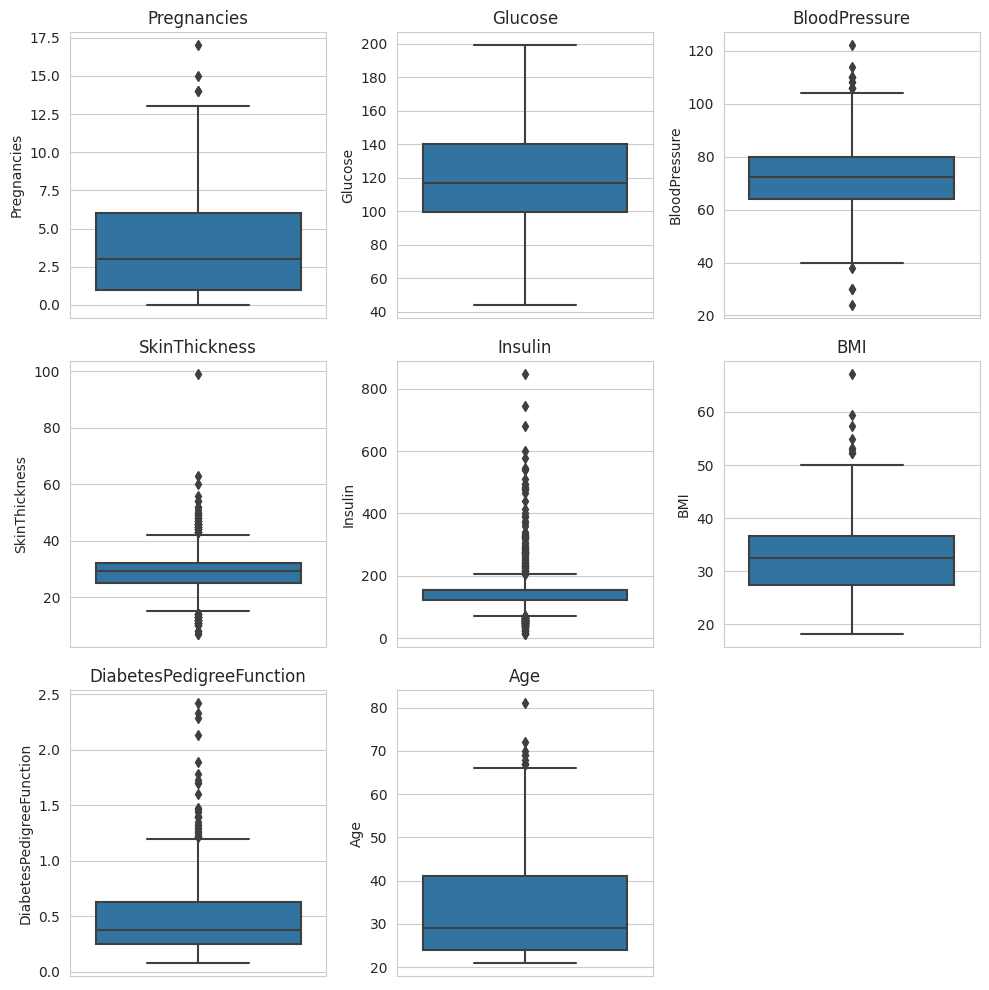

In [15]:
## Box Plot

# set the figure size
plt.figure(figsize = (10,10))

# initiating the histogram plot
for i, column in enumerate(df.columns[:-1],1):  # excluding Outcome column
  plt.subplot(3,3,i)
  sns.boxplot(y = df[column])
  plt.title(column, fontsize = 12)
  plt.ylabel(column)
  plt.tight_layout()


Insights, that we got from Boxoplot,

* **Pregnancies:** Some women in the group have been pregnant more times than most of the others.

* **Glucose:** A few people in the group have lower glucose levels than the rest.

* **Blood Pressure:** Some people in the group have either unusually low or high blood pressure readings.

* **Skin Thickness:** There are a few individuals with thicker skin than usual in the dataset.

* **Insulin:** Many people in the group have much higher insulin levels than the average.

* **BMI (Body Mass Index):** Some people in the group have a higher BMI, indicating that they might be overweight or obese.

* **Diabetes Pedigree Function:** Several individuals have a higher likelihood of diabetes because of their family history.

* **Age:** A few people in the group are older than the rest, showing up as outliers in the age distribution.

Text(0.5, 1.0, 'Correlation Heatmap')

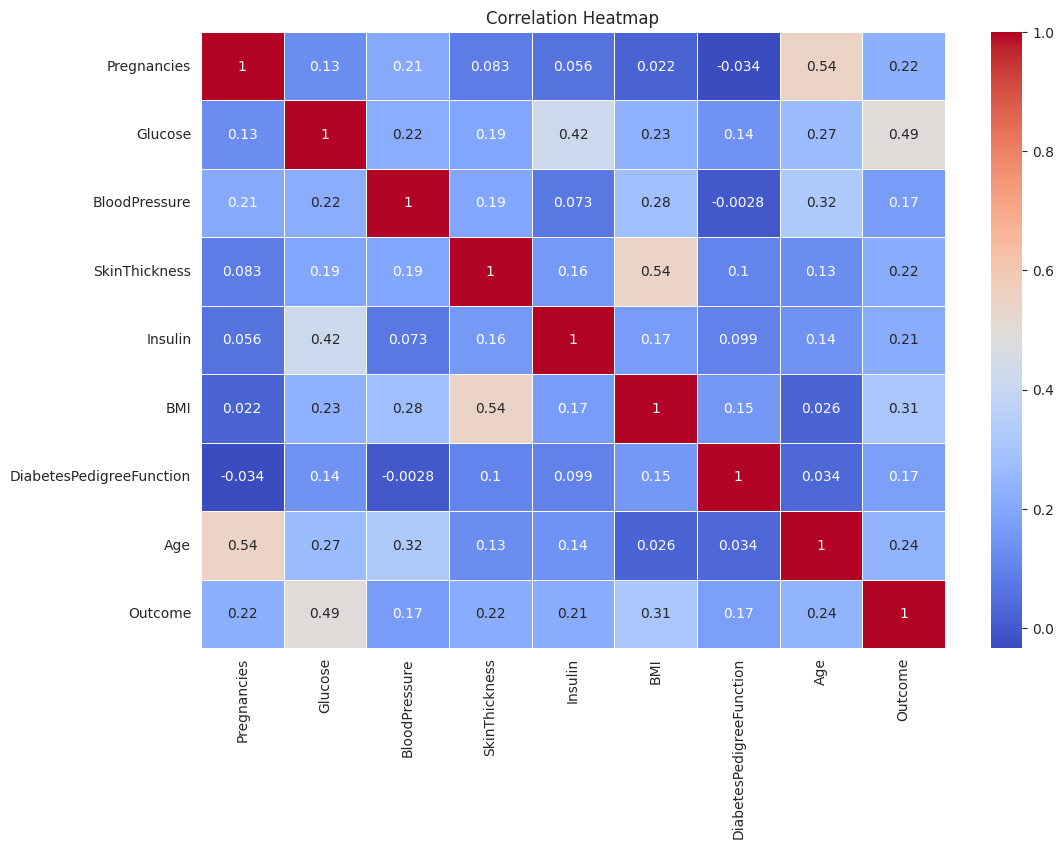

In [16]:
## plot the correlation heatmap

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')

##### Removing Outliers

In [22]:
# Removing outliers with IQR method
for i in df:
  if i != 'Outcome':

    p_75 = df[i].quantile(0.75)
    p_25 = df[i].quantile(0.25)
    iqr = p_75 - p_25
    ul = p_75+iqr*1.5
    ll = p_25-iqr*1.5
    df = df[(df[i] >= ll) & (df[i] <= ul)]


# **MODEL BUILDING**

Before creating the model, it's a good idea to scale the dataset. This helps improve accuracy by making sure all the input values are on a similar scale. It ensures that no single feature has too much influence on the learning process. Scaling is a common step in machine learning that makes the model training more stable and effective.


#### Scaling

In [24]:
## importing library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## perform scaling
for i in df:
  if i != 'Outcome':
    df[i] = sc.fit_transform(df[[i]])

##### Splitting the Dataset

In [25]:
# Before splitting we need to define X and Y varible
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

## Importing train-test-split
from sklearn.model_selection import train_test_split as t

# Splitting the Dataset with the help of train-test-split method.

X_train, X_test, Y_train, Y_test = t(X,Y, test_size = 0.3, random_state = 10)



### **Logistic Regression Model**

  why logistic regression?
  
Logistic Regression is a suitable choice when dealing with binary classification problems, as it models the probability of an instance belonging to a particular class. It is computationally efficient and interpretable, providing insights into the significance of features. Additionally, Logistic Regression performs well in scenarios with a linear relationship between the independent variables and the log-odds of the dependent variable.

In [26]:
## Importing LogisticRegreesion Model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [28]:
## train a LogisticRegression Model
lg.fit(X_train,Y_train)

LogisticRegression()

In [30]:
## prdict on the test set

Y_pred = lg.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1])

###### Accuracy

In [31]:
## importing library
from sklearn import metrics as m

In [37]:
## Evaluate the model performance

print( 'Accuracy is :',m.accuracy_score(Y_test,Y_pred))
print()
print('Classification_Report')
print(m.classification_report(Y_test,Y_pred))
print('Confusion_Matrix')
print(m.confusion_matrix(Y_test,Y_pred))

Accuracy is : 0.7050359712230215

Classification_Report
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        88
           1       0.67      0.39      0.49        51

    accuracy                           0.71       139
   macro avg       0.69      0.64      0.64       139
weighted avg       0.70      0.71      0.68       139

Confusion_Matrix
[[78 10]
 [31 20]]


The model's performance is reasonable for a baseline. The accuracy of approximately 70% indicates that model is correctly classiflying 70% of the test samples. The confusion metrix provides a breakdown of the true positives, true negatives , false positives, false negatives.